# Wine Quality Prediction

In [33]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Importing the data

In [34]:
# loading the dataset
df = pd.read_csv(r"C:\Users\Admin\Desktop\WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [35]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


# Information about the Dataset

In [36]:
#getting information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [37]:
#shape of the data
df.shape

(1143, 13)

There are 1143 entries and 13 features in total

In [38]:
# descriptive statistics of the data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


These statistics provide insight into the distribution and variability of each numerical feature in the dataset. 

The pH ranges from 2.74 to 4.01 with a mean of approximately 3.31.

Alcohol concentration ranges from 8.4 to 14.9 with a mean of approximately 10.44.

Quality ranges from 3 to 8 with a mean of approximately 5.66 meaning the quality of the sample was medium

# Data Pre-processing

# Cleaning the data

In [39]:
# check for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

There are no missing values

In [40]:
# check for duplicated values
df.duplicated().sum()

0

There are no duplicates

In [41]:
#calculate the frequency of each quality value
df['quality'].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

In [42]:
#convert the quality ratings into a binary classification
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
df.rename(columns={'quality': 'good-quality'}, inplace=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good-quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,4


In [43]:
df.drop( 'Id', axis=1)  # Removing 'Id' column from the dataset


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good-quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,0
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0


# Exploratory Data Analysis

In [44]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')

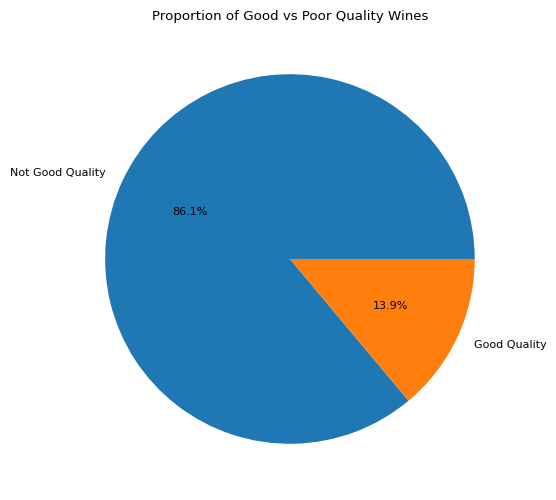

In [45]:
# Plot a pie chart showing the proportion of good quality vs. poor quality wines
plt.figure(figsize=(6,6))
df['good-quality'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Not Good Quality', 'Good Quality'])
plt.ylabel('')
plt.title('Proportion of Good vs Poor Quality Wines')
plt.show()


Most of the wine was not of good quality as indicated by the 86.1 percentage

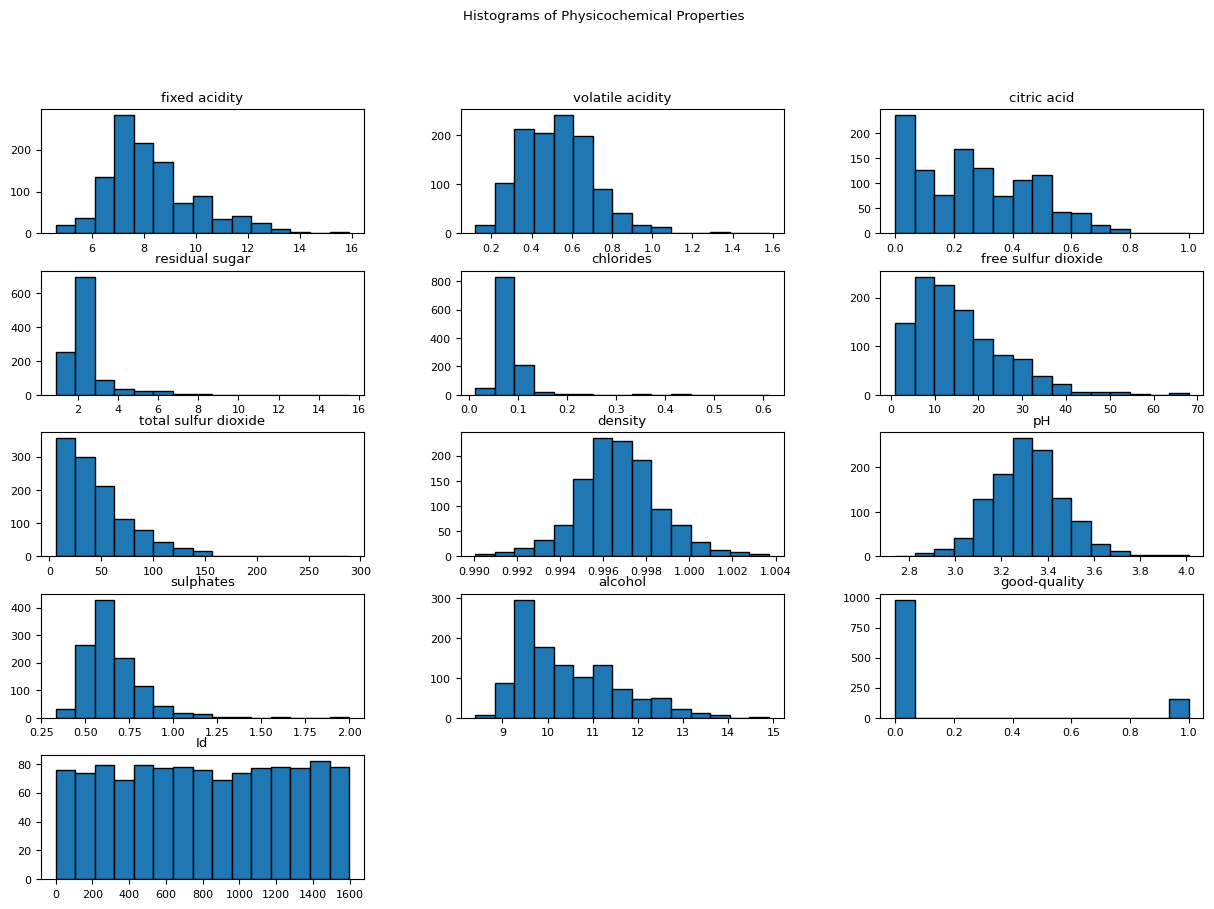

In [46]:
# Histograms of input variables
df.hist(bins=15, figsize=(15, 10), layout=(5, 3), edgecolor='black', grid=False)
plt.suptitle('Histograms of Physicochemical Properties')
plt.show()

Based on these histograms, there were no outliers.

The central tendency is identified by the peaks of the histogram. For example the 'volatile' acidity histogram, the peak is around 0.5 which is the mean.

Most of the features were positively skewed  but a feature like 'density' and 'pH' are approximately normally distributed.

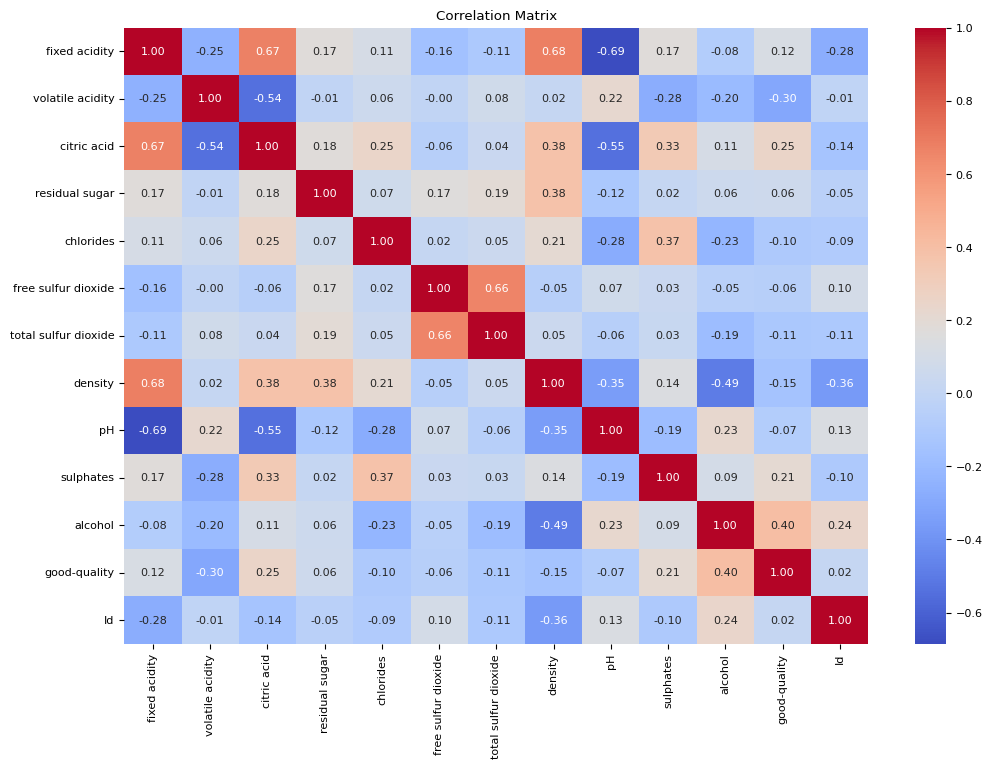

In [47]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

The heatmap visualizes the strength and direction of linear relationships between pairs of variables.

Positive correlations are indicated by warmer colors (e.g., red) for example 0.68 between 'density' and 'fixed acidity', while negative correlations are indicated by cooler colors (e.g., blue) for example -0.69 between 'pH' and 'fixed acidity'. 

A value close to 1 or -1 indicates a strong correlation, while a value close to 0 indicates a weak correlation. 

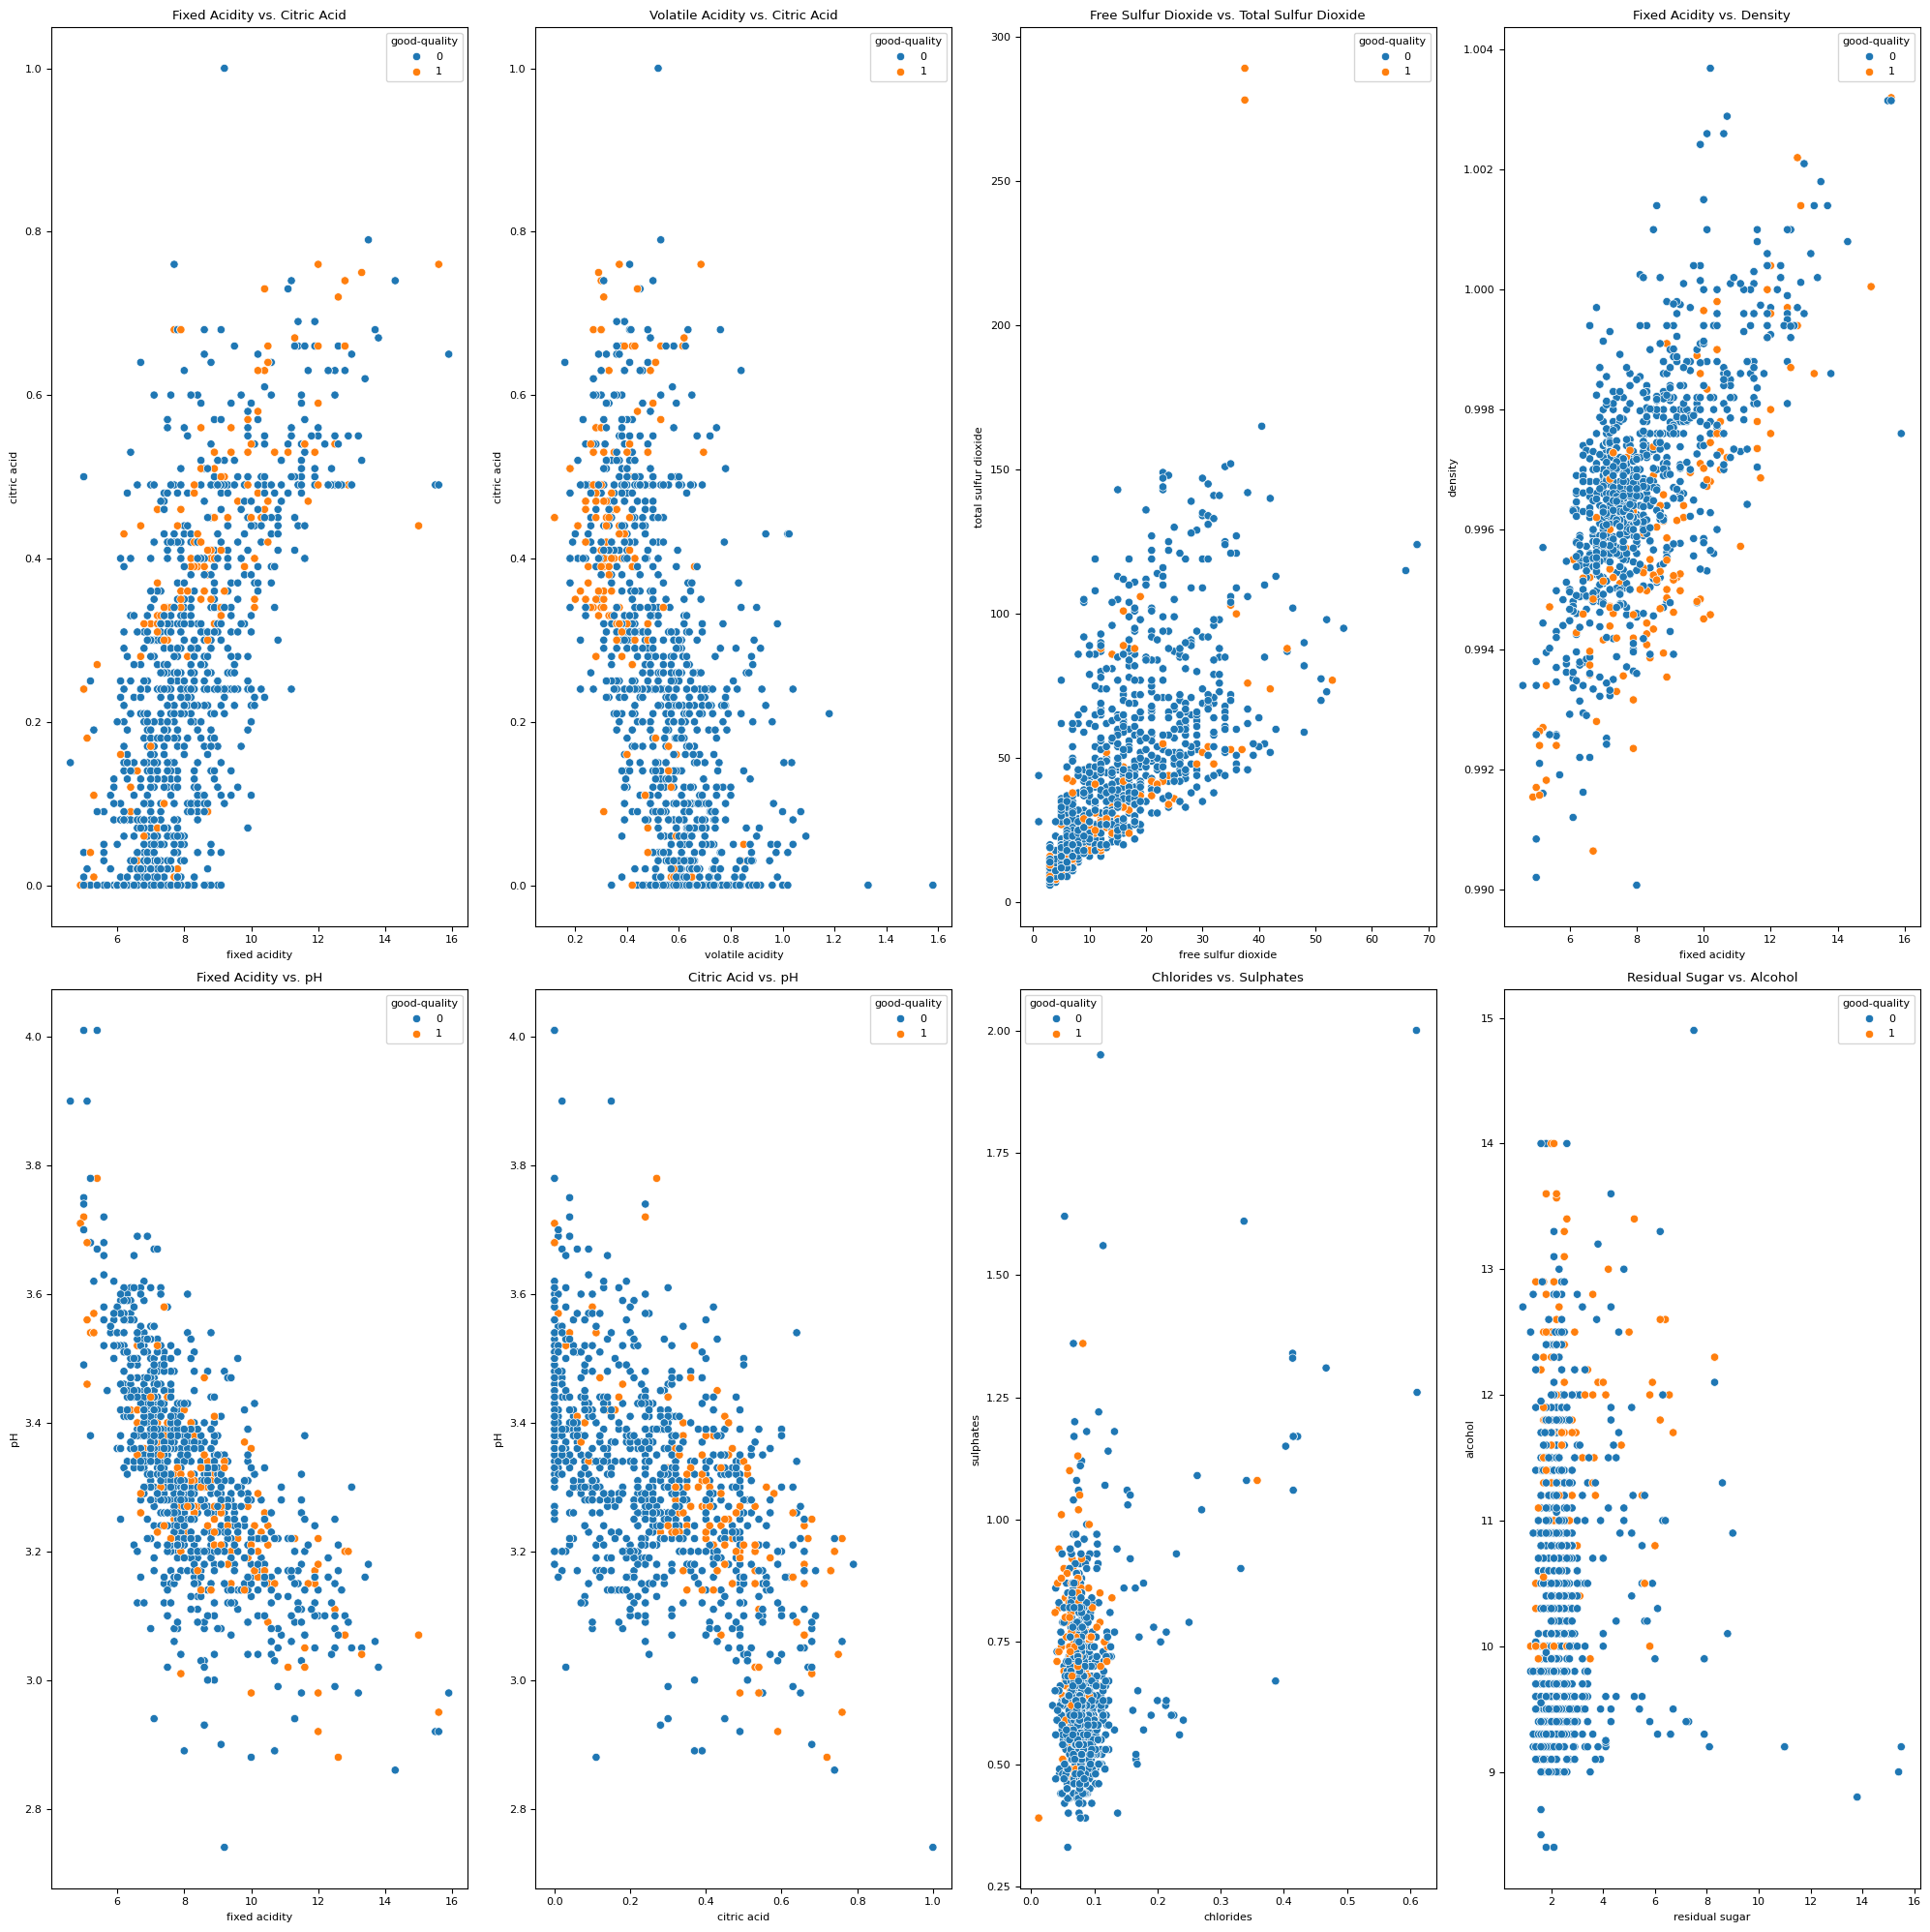

In [48]:
# Creating a figure with a 2x4 grid of subplots, each sized 20x20 inches
fig, ax = plt.subplots(2, 4, figsize=(20, 20))

# Scatter plot of fixed acidity vs. citric acid, colored by good quality
sns.scatterplot(x='fixed acidity', y='citric acid', hue='good-quality', data=df, ax=ax[0, 0])
ax[0, 0].set_title('Fixed Acidity vs. Citric Acid')

# Scatter plot of volatile acidity vs. citric acid, colored by good quality
sns.scatterplot(x='volatile acidity', y='citric acid', hue='good-quality', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Volatile Acidity vs. Citric Acid')

# Scatter plot of free sulfur dioxide vs. total sulfur dioxide, colored by good quality
sns.scatterplot(x='free sulfur dioxide', y='total sulfur dioxide', hue='good-quality', data=df, ax=ax[0, 2])
ax[0, 2].set_title('Free Sulfur Dioxide vs. Total Sulfur Dioxide')

# Scatter plot of fixed acidity vs. density, colored by good quality
sns.scatterplot(x='fixed acidity', y='density', hue='good-quality', data=df, ax=ax[0, 3])
ax[0, 3].set_title('Fixed Acidity vs. Density')

# Scatter plot of fixed acidity vs. pH, colored by good quality
sns.scatterplot(x='fixed acidity', y='pH', hue='good-quality', data=df, ax=ax[1, 0])
ax[1, 0].set_title('Fixed Acidity vs. pH')

# Scatter plot of citric acid vs. pH, colored by good quality
sns.scatterplot(x='citric acid', y='pH', hue='good-quality', data=df, ax=ax[1, 1])
ax[1, 1].set_title('Citric Acid vs. pH')

# Scatter plot of chlorides vs. sulphates, colored by good quality
sns.scatterplot(x='chlorides', y='sulphates', hue='good-quality', data=df, ax=ax[1, 2])
ax[1, 2].set_title('Chlorides vs. Sulphates')

# Scatter plot of residual sugar vs. alcohol, colored by good quality
sns.scatterplot(x='residual sugar', y='alcohol', hue='good-quality', data=df, ax=ax[1, 3])
ax[1, 3].set_title('Residual Sugar vs. Alcohol')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


There is a positive linear relationship between citric acid and fixed acidity. As citric acid increases so does the fixed acidity.
 
Combinations that have citric acid show that the wine is of good quality with higher citric acid concentrations. This is indicated by the hue of the data points.

There is negative linear relationship between pH and fixed acidity. As fixed acidity increases, the pH lowers.

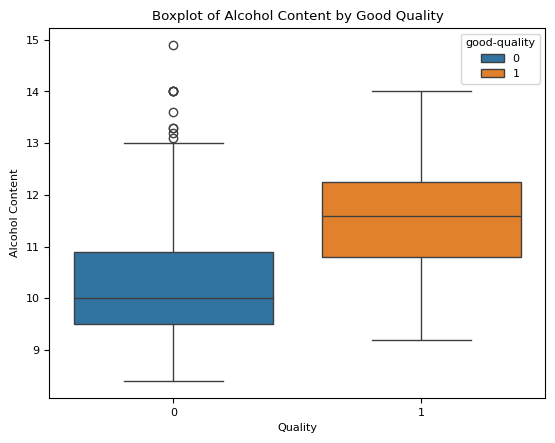

In [49]:
sns.boxplot(data=df, x='good-quality', y='alcohol', hue='good-quality')
plt.title('Boxplot of Alcohol Content by Good Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol Content')
plt.show()


Good quality wine has higher alcohol content than poor quality wine

# Feature Engineering

## Feature Selection and Extraction

In [50]:
# Split data into features and target variable
X = df.drop('good-quality', axis=1)  # Features (all columns except 'good-quality)
y = df['good-quality']  # Target variable


# Normalize/Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Feature correlation with target variable

In [51]:
correlation = X.corrwith(y)
print(correlation)

fixed acidity           0.123212
volatile acidity       -0.304523
citric acid             0.251146
residual sugar          0.064145
chlorides              -0.103985
free sulfur dioxide    -0.055977
total sulfur dioxide   -0.113373
density                -0.148670
pH                     -0.073318
sulphates               0.208020
alcohol                 0.403676
Id                      0.019165
dtype: float64


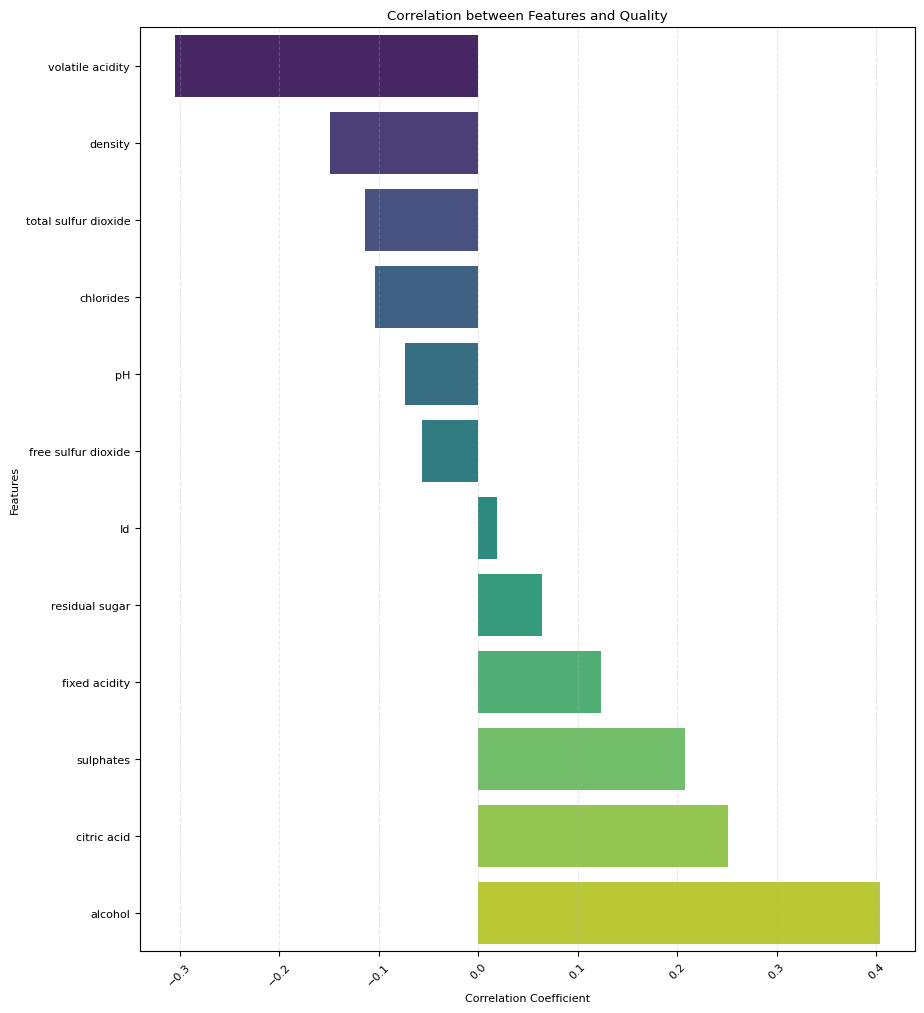

<Figure size 640x480 with 0 Axes>

In [52]:
# Sort the correlation values in ascending order
sorted_corr = correlation.sort_values()

# Bar graph of the correlation
plt.rc('font', size=8)
f, ax = plt.subplots(figsize=(10,12))
sns.barplot(x=sorted_corr.values, y=sorted_corr.index, palette="viridis")
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.title('Correlation between Features and Quality')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.xticks(rotation=45)
plt.show()
plt.clf()

The feature most positively correlated with 'Quality' is 'alcohol'

The feature most negatively correlated with 'Quality' is 'volatile acidity'

## Multicollinearity between features

In [53]:
corr_matrix = X.corr()
print(corr_matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.250728     0.673157   
volatile acidity          -0.250728          1.000000    -0.544187   
citric acid                0.673157         -0.544187     1.000000   
residual sugar             0.171831         -0.005751     0.175815   
chlorides                  0.107889          0.056336     0.245312   
free sulfur dioxide       -0.164831         -0.001962    -0.057589   
total sulfur dioxide      -0.110628          0.077748     0.036871   
density                    0.681501          0.016512     0.375243   
pH                        -0.685163          0.221492    -0.546339   
sulphates                  0.174592         -0.276079     0.331232   
alcohol                   -0.075055         -0.203909     0.106250   
Id                        -0.275826         -0.007892    -0.139011   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

## Feature Importance

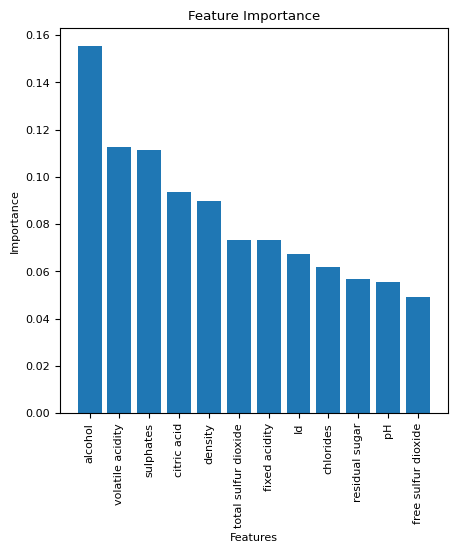

In [54]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Instantiate the random forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to your training data
rf_classifier.fit(X,y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Get the names of the features
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(5, 5))
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

# Model Selection

These models were chosen to balance simplicity, interpretability, performance, and robustness.

Logistic Regression: Simple, interpretable, and efficient for baseline performance.

Random Forest: Robust, non-linear model with feature importance insights.

Gradient Boosting: High performance and flexibility with complex data.

Support Vector Machine: Effective for high-dimensional spaces and non-linear decision boundaries.

In [55]:
# Convert quality scores to categorical labels (e.g., low, medium, high)
bins = [0, 5, 7, 10]
labels = ['low', 'medium', 'high']
y_class = pd.cut(y, bins=bins, labels=labels)

# Encode the labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_class)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)



## Training, Testing and Evaluating

Model: Logistic Regression
Accuracy: 0.8996
F1-Score: 0.8971
Mean Absolute Error: 0.1004
Root Mean Squared Error: 0.3169

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.54      0.57        28
           1       0.94      0.95      0.94       201

    accuracy                           0.90       229
   macro avg       0.77      0.74      0.75       229
weighted avg       0.90      0.90      0.90       229


Confusion Matrix:
 [[ 15  13]
 [ 10 191]]

------------------------------------------------------------

Model: Random Forest
Accuracy: 0.9301
F1-Score: 0.9265
Mean Absolute Error: 0.0699
Root Mean Squared Error: 0.2643

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.61      0.68        28
           1       0.95      0.98      0.96       201

    accuracy                           0.93       229
   macro avg       0.86      0.79      0.82       229
weighted 

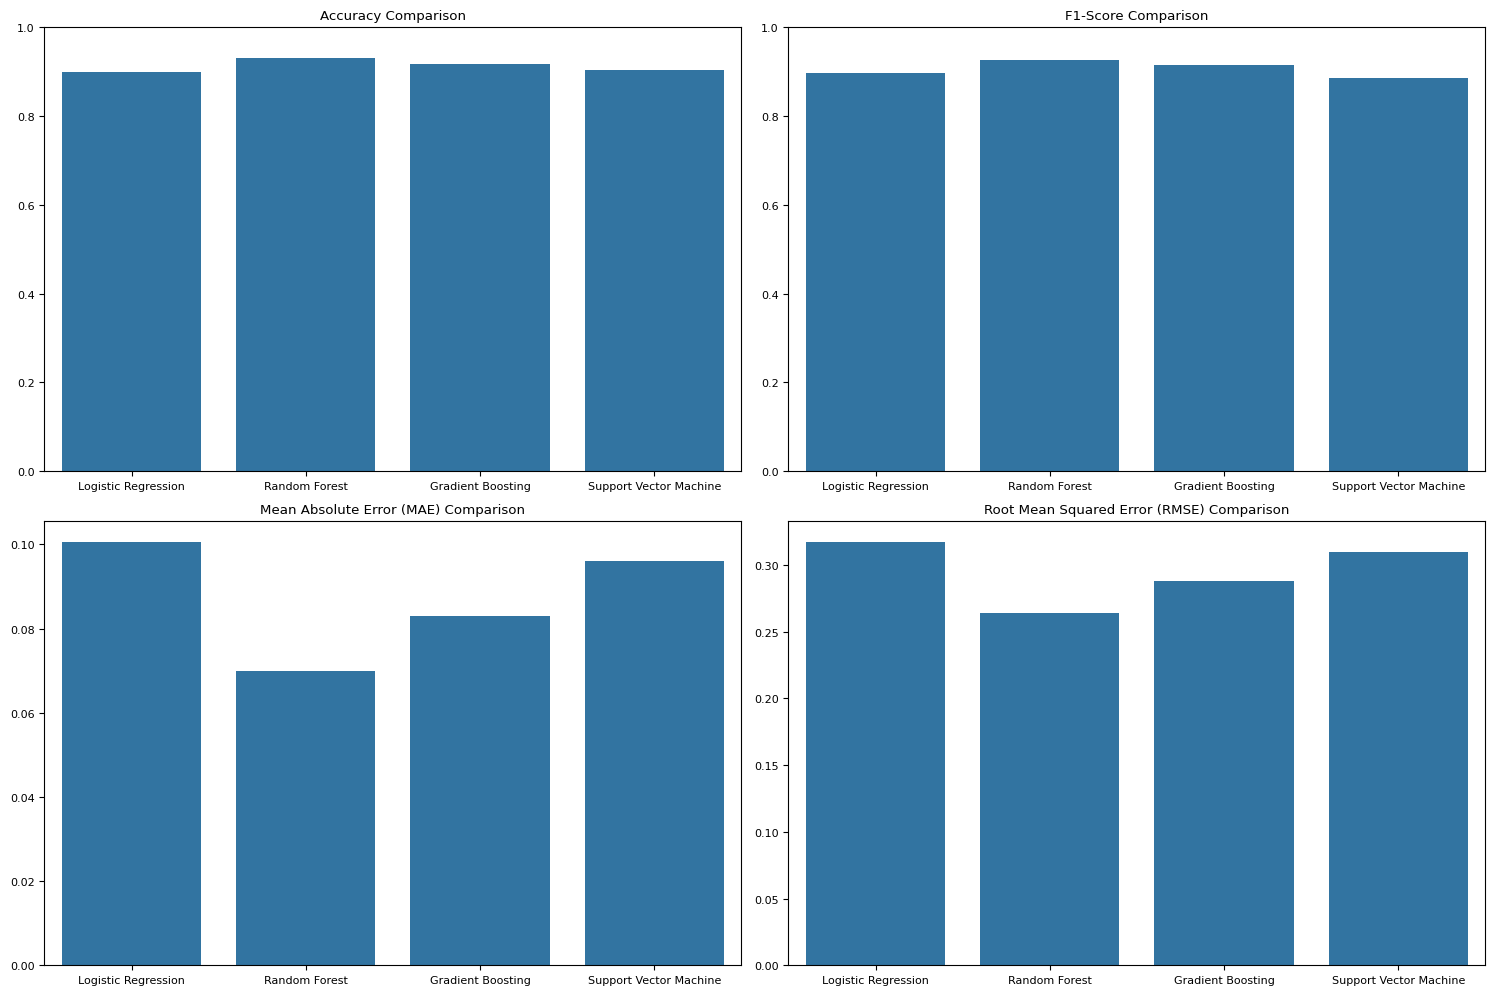

In [56]:
# Importing necessary libraries for classification and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initializing the classification models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC()
}

# Training and evaluating the models
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Store the results
    results[model_name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'mae': mae,
        'rmse': rmse,
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

# Display the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"F1-Score: {metrics['f1_score']:.4f}")
    print(f"Mean Absolute Error: {metrics['mae']:.4f}")
    print(f"Root Mean Squared Error: {metrics['rmse']:.4f}")
    print("\nClassification Report:\n", metrics['classification_report'])
    print("\nConfusion Matrix:\n", metrics['confusion_matrix'])
    print("\n" + "-"*60 + "\n")

#Visualizing the performance of each model
# Extracting metrics for visualization
models_names = list(results.keys())
accuracy = [results[model]['accuracy'] for model in models_names]
f1_scores = [results[model]['f1_score'] for model in models_names]
mae = [results[model]['mae'] for model in models_names]
rmse = [results[model]['rmse'] for model in models_names]

# Plotting the metrics
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.barplot(x=models_names, y=accuracy, ax=axs[0, 0])
axs[0, 0].set_title('Accuracy Comparison')
axs[0, 0].set_ylim(0, 1)

sns.barplot(x=models_names, y=f1_scores, ax=axs[0, 1])
axs[0, 1].set_title('F1-Score Comparison')
axs[0, 1].set_ylim(0, 1)

sns.barplot(x=models_names, y=mae, ax=axs[1, 0])
axs[1, 0].set_title('Mean Absolute Error (MAE) Comparison')

sns.barplot(x=models_names, y=rmse, ax=axs[1, 1])
axs[1, 1].set_title('Root Mean Squared Error (RMSE) Comparison')

plt.tight_layout()
plt.show()


## Logistic Regression
Class 0 (poor quality): The precision is 0.60, meaning 60% of the wines predicted as poor quality are indeed poor quality. 

The recall is 0.54, indicating that 54% of actual poor-quality wines are correctly identified. 

The F1-score of 0.57 represents the balance between precision and recall.

Class 1 (good quality): High precision and recall (0.94 and 0.95, respectively), leading to a high F1-score of 0.94, indicating the model performs well for predicting good quality wines.

Support: 28 samples of poor-quality wines and 201 samples of good-quality wines.

Confusion Matrix: The model correctly predicted 15 out of 28 poor-quality wines and 191 out of 201 good-quality wines.

## Random Forest
Class 0: Improved precision (0.77) and recall (0.61) compared to Logistic Regression, resulting in a better F1-score (0.68).

Class 1: High values (0.95 for both precision and recall), indicating very good performance in identifying good-quality wines.

Confusion Matrix: Correctly predicted 17 out of 28 poor-quality wines and 196 out of 201 good-quality wines.

## Gradient Boosting
Class 0: Slightly lower precision (0.68) and similar recall (0.61) compared to Random Forest, resulting in a comparable F1-score (0.64).

Class 1: High values (0.95 and 0.96), indicating strong performance in identifying good-quality wines.

Confusion Matrix: Correctly predicted 17 out of 28 poor-quality wines and 193 out of 201 good-quality wines.

## Support Vector Machine (SVM)
Class 0: Higher precision (0.75) but significantly lower recall (0.32), leading to a lower F1-score (0.45). This suggests the model struggles to identify poor-quality wines.

Class 1: High precision (0.91) and very high recall (0.99), resulting in a high F1-score (0.95).

Confusion Matrix: Correctly predicted only 9 out of 28 poor-quality wines but 198 out of 201 good-quality wines.

## Comparison and Insights
Accuracy: Random Forest has the highest accuracy (0.9301), followed by Gradient Boosting (0.9170), SVM (0.9039), and Logistic Regression (0.8996).

F1-Score: Similarly, Random Forest has the highest F1-score (0.9265), indicating a better balance between precision and recall.

Error Metrics: Random Forest also has the lowest Mean Absolute Error (0.0699) and Root Mean Squared Error (0.2643), suggesting it has the best overall prediction accuracy.

Class Imbalance Handling: All models except SVM show relatively good performance in predicting good-quality wines but have varied performance in predicting poor-quality wines.
 
SVM particularly struggles with poor-quality predictions.


## Conclusion
Random Forest is the best-performing model in this scenario based on accuracy, F1-score, and error metrics. 

It effectively balances precision and recall for both classes, making it a robust choice for predicting wine quality. 

Gradient Boosting is a close second, while Logistic Regression and SVM perform well but are slightly less effective, especially in handling class imbalances.